Load data and import libraries

In [33]:
import pandas as pd
from helpers.data_preprocessing import DataProcesser

data = pd.read_csv("./../../data/train_set_0520.csv", usecols=['comment', 'non-information'])

comments = data['comment'].apply(str)

### Preprocess data:
1. remove all special characters and accents
2. turn all characters into lower case
3. stemming --> put the word into its most basic form

In [34]:
dp = DataProcesser()

comments = dp.preprocess(comments)
comments = pd.Series(comments)

comments.head()



0    implnot taken from link comsunjavafxscenecontr...
1             iconsettooltiptextprintedviewmodelgetloc
2    synchron chang of the underli date valu with t...
3    ask if the user realli want to close the given...
4                                           css inform
dtype: object

Split words and put them into a list

In [35]:
split_comments = " ".join(comments)
split_comments = split_comments.split()
split_comments[0:15]

['implnot',
 'taken',
 'from',
 'link',
 'comsunjavafxscenecontrolbehaviortextareabehaviorcontextmenurequestedjavafxsceneinputcontextmenuev',
 'iconsettooltiptextprintedviewmodelgetloc',
 'synchron',
 'chang',
 'of',
 'the',
 'underli',
 'date',
 'valu',
 'with',
 'the']

count word frequency

In [36]:
from collections import Counter
counted_comments = Counter(split_comments)
{k: counted_comments[k] for k in list(counted_comments)[:15]}

{'implnot': 2,
 'taken': 10,
 'from': 105,
 'link': 161,
 'comsunjavafxscenecontrolbehaviortextareabehaviorcontextmenurequestedjavafxsceneinputcontextmenuev': 1,
 'iconsettooltiptextprintedviewmodelgetloc': 1,
 'synchron': 1,
 'chang': 99,
 'of': 330,
 'the': 1461,
 'underli': 3,
 'date': 18,
 'valu': 60,
 'with': 105,
 'temporalaccessorvalu': 1}

15 most common words

In [37]:
most_occur = counted_comments.most_common(15)
most_occur


[('the', 1461),
 ('to', 587),
 ('a', 455),
 ('is', 353),
 ('of', 330),
 ('thi', 311),
 ('in', 279),
 ('and', 272),
 ('if', 263),
 ('for', 258),
 ('entri', 215),
 ('it', 207),
 ('file', 201),
 ('be', 185),
 ('link', 161)]

most common words after removing stopwords

In [38]:
def get_most_common_words(li):
    l = " ".join(li) #put into one big string
    l = l.split() #split into words
    #count words
    l = Counter(l)
    return l

counted_comments = get_most_common_words(comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 1461),
 ('to', 587),
 ('a', 455),
 ('is', 353),
 ('of', 330),
 ('thi', 311),
 ('in', 279),
 ('and', 272),
 ('if', 263),
 ('for', 258),
 ('entri', 215),
 ('it', 207),
 ('file', 201),
 ('be', 185),
 ('link', 161)]

Word Cloud

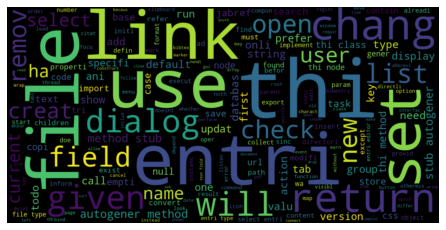

In [39]:
def create_word_cloud(l):
    # Generate a word cloud image
    l = " ".join(l)
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    wordcloud1 = WordCloud(width=1600, height=800).generate(l)
    import matplotlib.pyplot as plt

    # Display the generated image:
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

create_word_cloud(comments)

Non-information 'yes' comments

In [40]:
bad_comments = data[data['non-information'] == 'yes']
bad_comments = bad_comments['comment'].apply(str)

dp = DataProcesser()

bad_comments = dp.preprocess(bad_comments)
bad_comments = pd.Series(bad_comments)

bad_comments[:15]

0     implnot taken from link comsunjavafxscenecontr...
1              iconsettooltiptextprintedviewmodelgetloc
2     ask if the user realli want to close the given...
3                                       each entri type
4               final add thing to the current open tab
5                                         db file exist
6                       dir must be a folder not a file
7                                                  save
8                                 clear the current log
9                                      revert the chang
10      get the search describ for a given search queri
11              return the hashmap contain all key bind
12                add the given entri to thi node group
13                                              default
14                                      bug report bodi
dtype: object

What words are most common among the non-information 'yes' comments?

In [41]:
counted_comments = get_most_common_words(bad_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 154),
 ('method', 57),
 ('autogener', 54),
 ('stub', 54),
 ('to', 44),
 ('a', 43),
 ('if', 38),
 ('entri', 33),
 ('for', 33),
 ('of', 29),
 ('return', 28),
 ('given', 23),
 ('and', 23),
 ('file', 22),
 ('css', 21)]

Word Cloud of non-information 'yes' comments

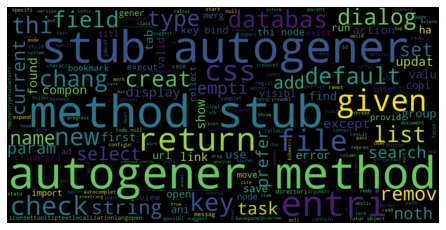

In [42]:
# Generate a word cloud image
create_word_cloud(bad_comments)

Non-information 'no' comments

In [43]:
data.head()
good_comments = data[data['non-information'] == 'no']
good_comments = good_comments['comment'].apply(str)

#clean data
dp = DataProcesser()

good_comments = dp.preprocess(good_comments)
good_comments = pd.Series(good_comments)

good_comments.head()

0    synchron chang of the underli date valu with t...
1                                           css inform
2    check if there is a default type with the same...
3    todo usernam domain and ident should be includ...
4    alreadi pars via command line paramet eg jabre...
dtype: object

What words are most common among the non-information 'no' comments?

In [44]:
counted_comments = get_most_common_words(good_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 1307),
 ('to', 543),
 ('a', 412),
 ('is', 338),
 ('of', 301),
 ('thi', 293),
 ('in', 267),
 ('and', 249),
 ('if', 225),
 ('for', 225),
 ('it', 193),
 ('entri', 182),
 ('file', 179),
 ('be', 176),
 ('link', 155)]

Non-information 'no' comments

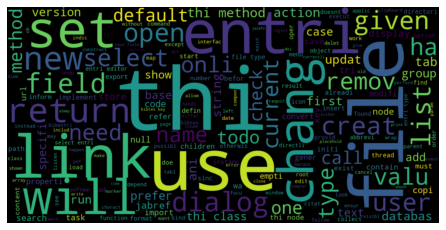

In [45]:
# Generate a word cloud image
create_word_cloud(good_comments)


Remove stopwords from comments

In [46]:
comments = comments.map(DataProcesser.remove_stopwords)
comments.head()

0    implnot taken link comsunjavafxscenecontrolbeh...
1             iconsettooltiptextprintedviewmodelgetloc
2    synchron chang underli date valu temporalacces...
3             ask user realli want close given databas
4                                           css inform
dtype: object

Most frequent words, removed stopwords

In [47]:
counted_comments = get_most_common_words(comments)
most_occur = counted_comments.most_common(15)
most_occur

[('thi', 311),
 ('entri', 215),
 ('file', 201),
 ('link', 161),
 ('method', 148),
 ('use', 139),
 ('return', 112),
 ('new', 104),
 ('set', 103),
 ('chang', 99),
 ('type', 97),
 ('field', 92),
 ('given', 91),
 ('dialog', 91),
 ('string', 81)]

Most frequent words- non-information 'yes', removed stopwords

In [48]:
bad_comments = bad_comments.map(DataProcesser.remove_stopwords)
counted_comments = get_most_common_words(bad_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('method', 57),
 ('autogener', 54),
 ('stub', 54),
 ('entri', 33),
 ('return', 28),
 ('given', 23),
 ('file', 22),
 ('css', 21),
 ('key', 20),
 ('thi', 18),
 ('check', 17),
 ('new', 15),
 ('databas', 14),
 ('chang', 13),
 ('default', 13)]

Most frequent words- non-information 'no', removed stopwords

In [50]:
good_comments = good_comments.map(DataProcesser.remove_stopwords)
counted_comments = get_most_common_words(good_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('thi', 293),
 ('entri', 182),
 ('file', 179),
 ('link', 155),
 ('use', 133),
 ('set', 92),
 ('method', 91),
 ('new', 89),
 ('chang', 86),
 ('type', 85),
 ('return', 84),
 ('field', 80),
 ('dialog', 79),
 ('select', 71),
 ('string', 69)]